In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import io
import requests
r = requests.get('https://osf.io/sy5xt/download')
if r.status_code != 200:
  print('Failed to download data')
else:
  spike_times = np.load(io.BytesIO(r.content), allow_pickle=True)['spike_times']

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
Mean number of spikes: 10319.35
Median number of spikes: 5128.00
Maximum number of spikes: 125324.00


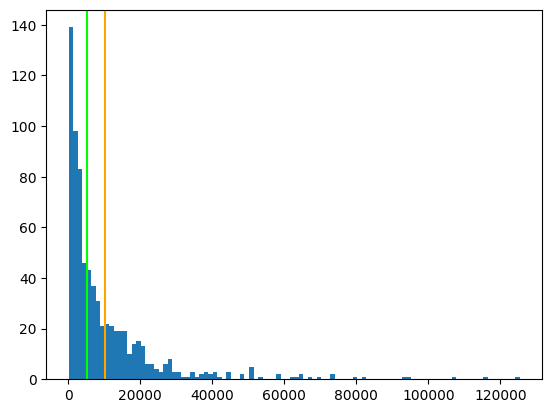

In [99]:
spike_counts = [len(x) for x in spike_times]
print(type(spike_times), type(spike_times[0]))
# array of arrays, each with the data for one neuron across the time period.\
mean_spikes = np.mean(spike_counts)
median_spikes = np.median(spike_counts)
print(f"Mean number of spikes: {mean_spikes:.2f}")
print(f"Median number of spikes: {median_spikes:.2f}")
print(f"Maximum number of spikes: {np.max(spike_counts):.2f}")
plt.hist(spike_counts, bins=100);
plt.axvline(mean_spikes, color="orange", label="Mean");
# Exercise 1.2:
plt.axvline(median_spikes, color="lime", label="Median");
# Q1 = np.percentile(spike_counts, 25)
# Q3 = np.percentile(spike_counts, 75)
# plt.axvline(Q1, color="black")
# plt.axvline(Q3, color="black")

In [242]:
all_intervals = []

def restrict_spike_intervals(spike_times, s_min, s_max):
    for s_t in spike_times:
        restricted_intervals = [n for n in s_t if n >= s_min and n <= s_max]
        all_intervals.append(restricted_intervals)
    return all_intervals
    
restricted_spike_intervals = restrict_spike_intervals(spike_times, 5, 15)

In [228]:
all_restricted_intervals = np.concatenate(restricted_spike_intervals)

print("Length of all intervals:", len(np.concatenate(spike_times)))
print("Length of restricted:", len(all_restricted_intervals))
print(f"Mean interval: {np.mean(all_restricted_intervals):.2f}")
print(f"Median interval: {np.median(all_restricted_intervals):.2f}")
print(f"Maximum interval: {np.max(all_restricted_intervals):.2f}")

Length of all intervals: 7574404
Length of restricted: 24849
Mean interval: 9.99
Median interval: 9.97
Maximum interval: 15.00


In [229]:
print(f"Total percent of all intervals in this range: {len(all_restricted_intervals) / len(np.concatenate(spike_times)) * 100:.2f}%")
spike_times_flat = np.concatenate(spike_times)
experiment_duration = np.ptp(spike_times_flat) # uses np's point-to-point function to fins the maximum interval in the whole thing
interval_duration = 10

frac_interval_time = interval_duration / experiment_duration
print(f"{frac_interval_time:.2%} of the total time is in the interval")
# oh man, close enough i guess

Total percent of all intervals in this range: 0.33%
0.37% of the total time is in the interval


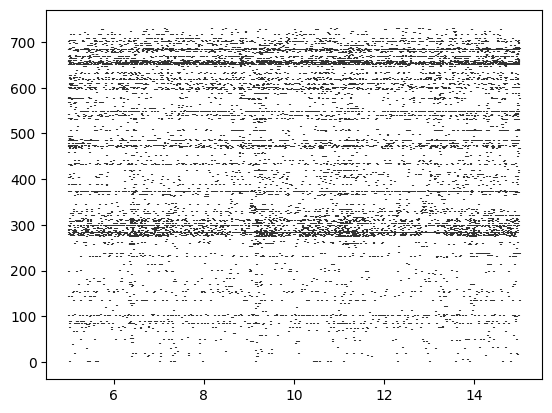

In [250]:
restricted_spike_intervals = np.array(restricted_spike_intervals, object)
neuron_idx = np.arange(0, len(spike_times))
plt.eventplot(restricted_spike_intervals[neuron_idx], color=".2");

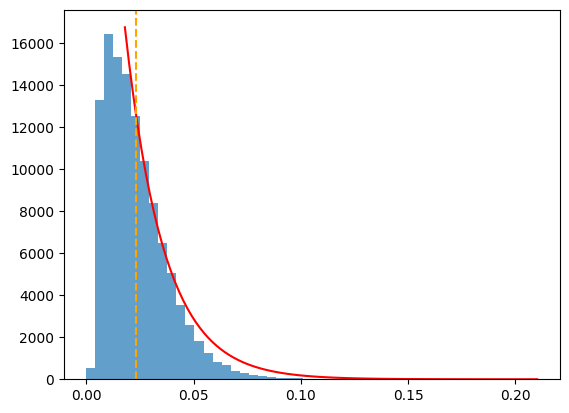

In [311]:
x_range = np.linspace(0.018, single_neuron_interval.max(), 100)
y_values = exponential(x_range, 5000, -55, 0.04)

plt.hist(single_neuron_interval, bins=50, alpha=0.7, label='Data');
plt.plot(x_range, y_values, color='red');
plt.axvline(np.mean(single_neuron_interval), color="orange", linestyle='--', label='Mean');

In [318]:
# import torch
# import torch.nn as nn

# model = 

# y_values
# counts, edges = np.histogram(single_neuron_interval, bins=50)
# centers = (edges[:-1] + edges[1:]) / 2